## During the polar vortex, record low temperatures were set around Chicago. On Northerly Island, the National Weather Service recorded a low of -22&deg;F One of the nodes (001e06113cf1 ) is on Michigan Ave. and Randolph St. by Millenium Park, not far from Northerly Island.

## How accurate is this node?

### 1. Import the January 2019 data for this node ("Millenium_node.csv)
### 2. Set the "timestamp" as the index.
### 3. Find the names of all of the temperature sensors in the node.
### 4. Convert the `value_hrf`'s to Farhenheit

In [47]:
import pandas as pd

In [48]:
url = 'https://raw.githubusercontent.com/jdomyancich/Binder-Test/master/data/millenium_temp.csv'

In [49]:
polar = pd.read_csv(url, error_bad_lines=False)

In [50]:
polar.head()

,Unnamed: 0,Unnamed: 0.1,timestamp,node_id,subsystem,sensor,parameter,value_raw,value_hrf
0,37,963,2019/01/01 00:00:20,001e06113cf1,metsense,pr103j2,temperature,665,5.05
1,79,2246,2019/01/01 00:00:45,001e06113cf1,metsense,pr103j2,temperature,664,4.95
2,121,3532,2019/01/01 00:01:11,001e06113cf1,metsense,pr103j2,temperature,663,4.85
3,163,4729,2019/01/01 00:01:36,001e06113cf1,metsense,pr103j2,temperature,666,5.15
4,205,5964,2019/01/01 00:02:01,001e06113cf1,metsense,pr103j2,temperature,667,5.20


In [51]:
polar['timestamp'] = pd.to_datetime(polar['timestamp'])

In [52]:
polar.head()

,Unnamed: 0,Unnamed: 0.1,timestamp,node_id,subsystem,sensor,parameter,value_raw,value_hrf
0,37,963,2019-01-01 00:00:20,001e06113cf1,metsense,pr103j2,temperature,665,5.05
1,79,2246,2019-01-01 00:00:45,001e06113cf1,metsense,pr103j2,temperature,664,4.95
2,121,3532,2019-01-01 00:01:11,001e06113cf1,metsense,pr103j2,temperature,663,4.85
3,163,4729,2019-01-01 00:01:36,001e06113cf1,metsense,pr103j2,temperature,666,5.15
4,205,5964,2019-01-01 00:02:01,001e06113cf1,metsense,pr103j2,temperature,667,5.20


In [53]:
polar.index = polar['timestamp']

In [54]:
polar.head()

,Unnamed: 0,Unnamed: 0.1,timestamp,node_id,subsystem,sensor,parameter,value_raw,value_hrf
timestamp,,,,,,,,,
2019-01-01 00:00:20,37,963,2019-01-01 00:00:20,001e06113cf1,metsense,pr103j2,temperature,665,5.05
2019-01-01 00:00:45,79,2246,2019-01-01 00:00:45,001e06113cf1,metsense,pr103j2,temperature,664,4.95
2019-01-01 00:01:11,121,3532,2019-01-01 00:01:11,001e06113cf1,metsense,pr103j2,temperature,663,4.85
2019-01-01 00:01:36,163,4729,2019-01-01 00:01:36,001e06113cf1,metsense,pr103j2,temperature,666,5.15
2019-01-01 00:02:01,205,5964,2019-01-01 00:02:01,001e06113cf1,metsense,pr103j2,temperature,667,5.20


In [55]:
del polar['timestamp']

In [56]:
polar.head()

,Unnamed: 0,Unnamed: 0.1,node_id,subsystem,sensor,parameter,value_raw,value_hrf
timestamp,,,,,,,,
2019-01-01 00:00:20,37,963,001e06113cf1,metsense,pr103j2,temperature,665,5.05
2019-01-01 00:00:45,79,2246,001e06113cf1,metsense,pr103j2,temperature,664,4.95
2019-01-01 00:01:11,121,3532,001e06113cf1,metsense,pr103j2,temperature,663,4.85
2019-01-01 00:01:36,163,4729,001e06113cf1,metsense,pr103j2,temperature,666,5.15
2019-01-01 00:02:01,205,5964,001e06113cf1,metsense,pr103j2,temperature,667,5.20


In [57]:
polar_temps = polar[(polar['parameter'] == "temperature")]

In [58]:
polar_temps.drop_duplicates('sensor')

,Unnamed: 0,Unnamed: 0.1,node_id,subsystem,sensor,parameter,value_raw,value_hrf
timestamp,,,,,,,,
2019-01-01 00:00:20,37,963,001e06113cf1,metsense,pr103j2,temperature,665,5.05


Convert the temperatures to Fahrenheit.

In [59]:
def cel_to_far(temp_C):
    temp_F = (temp_C * 9/5) + 32
    return temp_F

In [60]:
polar_temps['Temp_F'] = polar_temps['value_hrf'].apply(cel_to_far)

In [61]:
polar_temps['value_hrf'] = polar_temps['value_hrf'].astype(float)

In [62]:
polar_temps['Temp_F'] = polar_temps['value_hrf'].apply(cel_to_far)

In [63]:
polar_temps.head()

,Unnamed: 0,Unnamed: 0.1,node_id,subsystem,sensor,parameter,value_raw,value_hrf,Temp_F
timestamp,,,,,,,,,
2019-01-01 00:00:20,37,963,001e06113cf1,metsense,pr103j2,temperature,665,5.05,41.09
2019-01-01 00:00:45,79,2246,001e06113cf1,metsense,pr103j2,temperature,664,4.95,40.91
2019-01-01 00:01:11,121,3532,001e06113cf1,metsense,pr103j2,temperature,663,4.85,40.73
2019-01-01 00:01:36,163,4729,001e06113cf1,metsense,pr103j2,temperature,666,5.15,41.27
2019-01-01 00:02:01,205,5964,001e06113cf1,metsense,pr103j2,temperature,667,5.20,41.36


### Let's get an idea of the range of temperature values.


In [64]:
polar_temps['Temp_F'].describe()

count    171605.000000
mean         28.944437
std          11.526334
min         -16.150000
25%          27.500000
50%          31.550000
75%          33.980000
max          61.700000
Name: Temp_F, dtype: float64

There is a large variation in the temperatures (value_hrf) for the different sensors (-899&deg;F to 466&deg;F). Some of which violate the laws of physics and common sense.

# Which AoT temperature sensor is the most accurate?

Use the National Weather Service observations at Northerly Island to compare. The blue bars are what you want to pay attention to.

<img src = "chart.png" height=400 width = 600 align=center>

We can narrow our search by getting an idea of the temperature range for each sensor. Even though these values sit in the same column, we can use the `groupby` method to analyze each sensor individually.

In [65]:
polar_temps.groupby('sensor')['Temp_F'].min()

sensor
pr103j2   -16.15
Name: Temp_F, dtype: float64

It looks like `pr103j2` might be the best candidate because its minimum is closest to the National Weather Services record low (-22&deg;C).

Let's make a plot of its temperatures for the month of January.

In [68]:
sensor_temp = polar_temps[polar_temps['sensor'] == 'pr103j2'] 

In [69]:
sensor_temp.head()

,Unnamed: 0,Unnamed: 0.1,node_id,subsystem,sensor,parameter,value_raw,value_hrf,Temp_F
timestamp,,,,,,,,,
2019-01-01 00:00:20,37,963,001e06113cf1,metsense,pr103j2,temperature,665,5.05,41.09
2019-01-01 00:00:45,79,2246,001e06113cf1,metsense,pr103j2,temperature,664,4.95,40.91
2019-01-01 00:01:11,121,3532,001e06113cf1,metsense,pr103j2,temperature,663,4.85,40.73
2019-01-01 00:01:36,163,4729,001e06113cf1,metsense,pr103j2,temperature,666,5.15,41.27
2019-01-01 00:02:01,205,5964,001e06113cf1,metsense,pr103j2,temperature,667,5.20,41.36


What was the minumum temperature for this node for the month of January?

## Import Matplotlib

We will use the pyplot module which provides full control of line styles, font and other properties. The style package gives support for easy-to-switch plotting “styles”.  We will use a style called "seaborn", but others are available.

In [70]:
import matplotlib.pyplot as plt
plt.style.use('seaborn') 

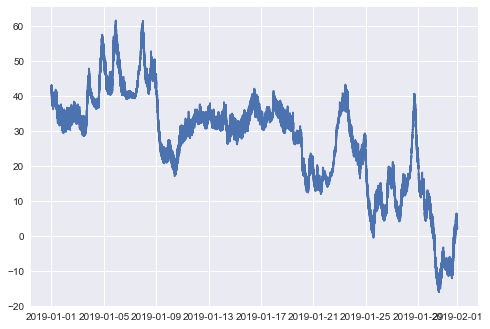

In [71]:
plt.plot(sensor_temp.index, sensor_temp['Temp_F'])

Text(0.5, 1.0, 'Brrr... Polar Vortex')

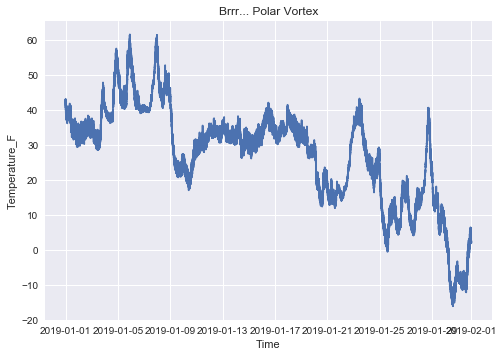

In [72]:
#don't make the mistake of plt.xlabel = 'Time'. This will set the function to the string and you
#won't be able to fix it unless you restart the kernel.

plt.plot(sensor_temp.index, sensor_temp['Temp_F'])
plt.xlabel('Time')
plt.ylabel('Temperature_F')
plt.title('Brrr... Polar Vortex')

<Figure size 504x360 with 0 Axes>

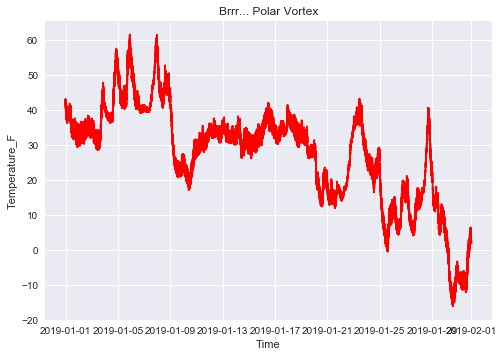

<Figure size 504x360 with 0 Axes>

In [73]:
plt.plot(sensor_temp.index, sensor_temp['Temp_F'], '-r')
plt.xlabel('Time')
plt.ylabel('Temperature_F')
plt.title('Brrr... Polar Vortex')
plt.figure(figsize=(7, 5))
